<img src='Data/Input/UP Data Science Society Logo 2.png' width=700>

# [1] Python for Statistics

# [1.2] Hacker Statistics

**Prepared by:**

- Lanz Lagman
- Dexter To
- Jeremiah Marimon

**Topics to cover:** 

- Hacker Statistics

**Weekly Objectives:**

- Review of `for` and `while` loops
- Produce statistical simulations using hacker statistics

**References:**
- [Johnson, MIT Course 18.335 - Square Roots via Newton’s Method](https://math.mit.edu/~stevenj/18.335/newton-sqrt.pdf)
- [Jake Vanderplas - Statistics for Hackers - PyCon 2016](https://www.youtube.com/watch?v=Iq9DzN6mvYA)
    - [[Speaker Deck] Jake Vanderplas - Statistics for Hackers](https://speakerdeck.com/pycon2016/jake-vanderplas-statistics-for-hackers)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# I. Loops

> "If you can write a for-loop, you can do statistics."  
> Jake Vanderplas   

## A. `for` loops

- `for` loops iterate over each element of a sequential data type.

### 1. Basic Examples

- To iterate and print each element of `range(4)`:

In [ ]:
for i in range(4): 
    print(i)

0
1
2
3


In [ ]:
for i in range(4): print(i)

0
1
2
3


- To create a list and 1D numpy array:

In [ ]:
[i for i in range(4)]

[0, 1, 2, 3]

In [ ]:
np.array([i for i in range(4)])

array([0, 1, 2, 3])

### 2. `zip()`

- The `zip()` function takes in n-iterables of equal length then returns an iterator.
- Let's create two lists for latin letters and their greek equivalent, expressed via unicode.

In [ ]:
latin_list = ['a', 'b', 'c', 'd']
greek_list = [u'\u03B1', u'\u03B2', u'\u03B3', u'\u03B4']
greek_list

['α', 'β', 'γ', 'δ']

- Creating lists out of zipped items returns a series of tuples for each matching element.

In [ ]:
list(zip(latin_list,greek_list))

[('a', 'α'), ('b', 'β'), ('c', 'γ'), ('d', 'δ')]

- To use in for loops:

In [ ]:
for l, g in zip(latin_list,greek_list):
    print(f"Latin: {l}, Greek: {g}")

Latin: a, Greek: α
Latin: b, Greek: β
Latin: c, Greek: γ
Latin: d, Greek: δ


- In terms of `enumerate()`:

In [ ]:
for ind, l in enumerate(latin_list):
    print(ind, l)

0 a
1 b
2 c
3 d


- This is the equivalent `zip()` version:
- Note that `enumerate()` can only take a single iterable, unlike `zip()`.
- That is why, I prefer `zip()` instead of `enumerate()`, not only because of the much shorter character length, but also due to overall flexibility.

In [ ]:
for ind, l in zip(range(len(latin_list)),latin_list):
    print(ind, l)

0 a
1 b
2 c
3 d


### 3. `zip()` for plotting

- To iterate over each subplots, let's say we want to plot $x, x^2, x^3, x^4$:

In [ ]:
x = np.arange(0,101,1)
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

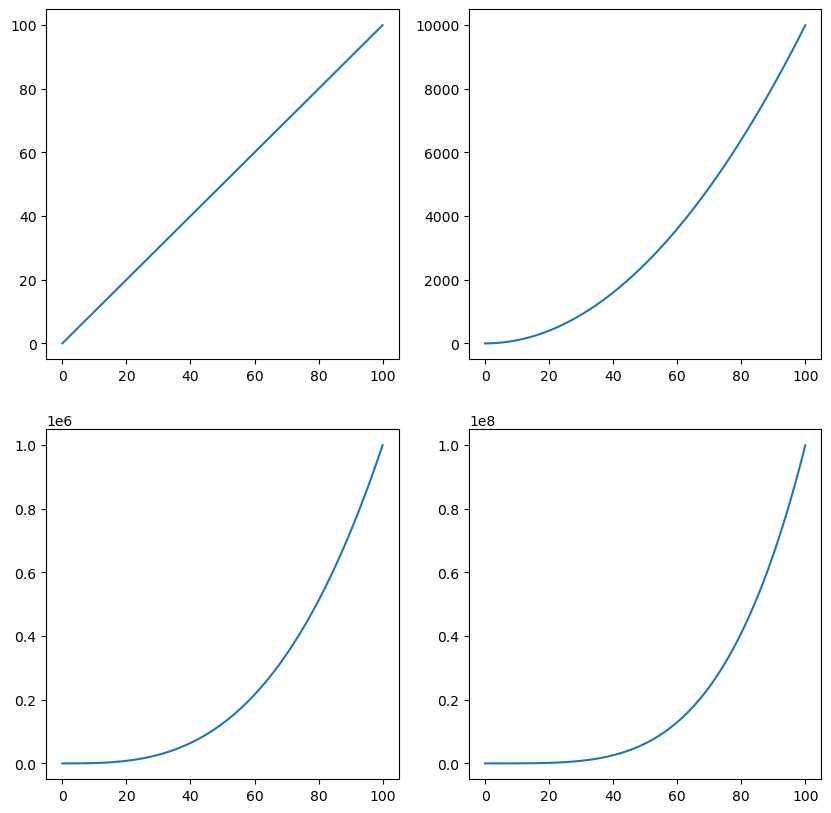

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

x = np.arange(0,101,1)

ax[0,0].plot(x, x)
ax[0,1].plot(x, x**2)
ax[1,0].plot(x, x**3)
ax[1,1].plot(x, x**4)


- But we want to perform a standard customization for each subplot, like removing the top and right border line and adding  x and y-labels. This could be done through:

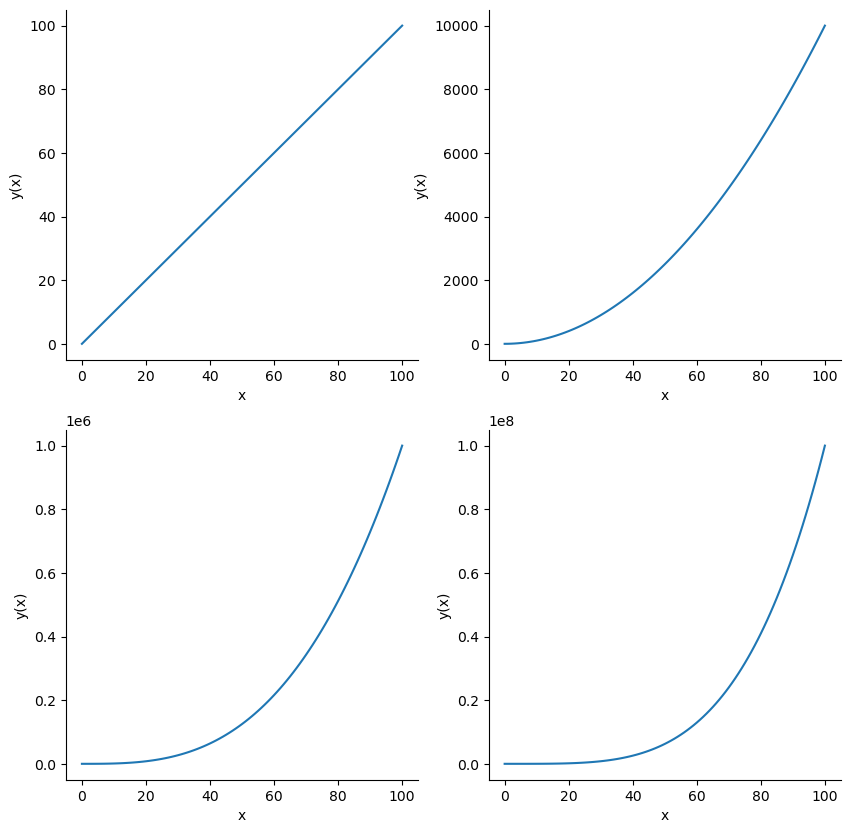

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

x = np.arange(0,101,1)

ax[0,0].plot(x, x)
ax[0,1].plot(x, x**2)
ax[1,0].plot(x, x**3)
ax[1,1].plot(x, x**4)

for axs in ax.reshape(-1):
    axs.set(xlabel='x', ylabel='y(x)')
    
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)
    axs.tick_params(left=True, bottom=True, 
                    labelleft=True, labelbottom=True)

- But how do we include a loop for the title?
- We can use `zip()` for parallel iteration. We can therefore iterate over each axes and exponents.
- We can even include all the $y(x)$ and store them in `y_list` and include it to our zipped list.

In [ ]:
y_list = [x, x**2, x**3, x**4]

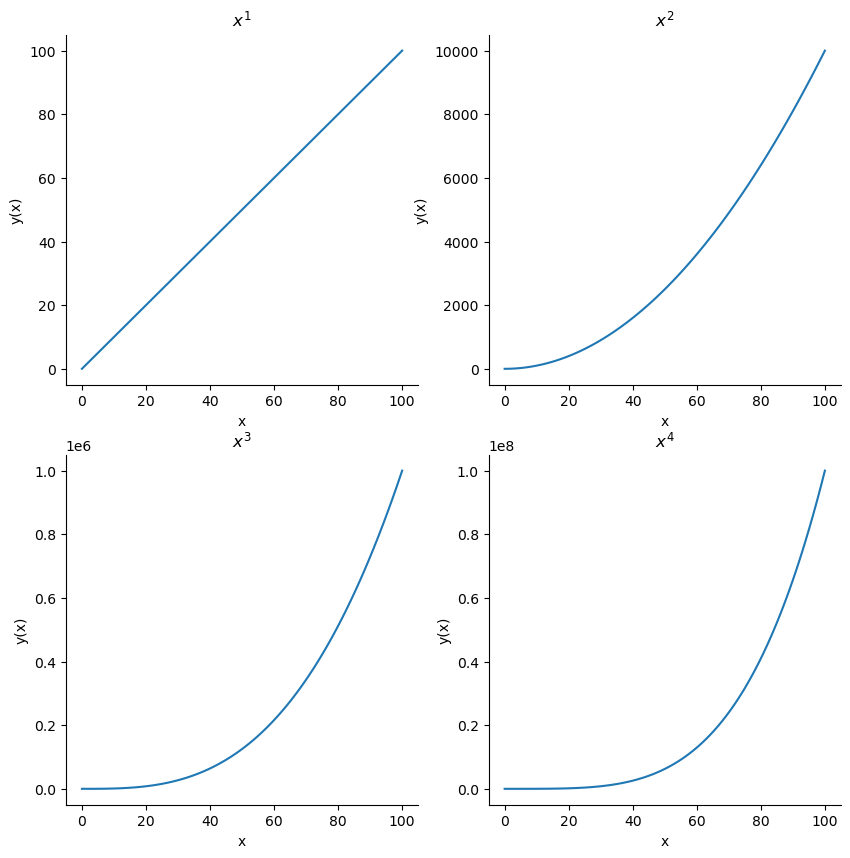

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(10,10))


for axs, i, y in zip(ax.reshape(-1), range(1,5), y_list):
    
    axs.plot(x,y)
    axs.set(title=f'$x^{i}$', xlabel='x', ylabel='y(x)')
    
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)
    axs.tick_params(left=True, bottom=True, 
                    labelleft=True, labelbottom=True)

## B. `while` loops

- `while` loops execute a set of statements until a condition is met.
- In this case, we can demonstrate by creating a function for Newton's algorithm for approximating square roots.

### Newton's Algorithm

$$ x_{n+1} = \frac{1}{2}\left( x_n + \frac{a}{x_n} \right) $$

The algorithm starts with a guess $x_1 > 0$, which progressively computes for $x_{n+1}$ until the condition $x_n = x_{n+1}$ is met, or at least $x_n \approx x_{n+1}$.

### The code: `Newton_sqrt`

- start with input variables `a`, which is the number that we want to find its square root, and `guess`.
- `x` in our case, will be set to `x=1` by default, so $x_n=1$
- The `while` loops begin with a `True` statement:
    - `y`, or $x_{n+1}$ will be continuously solved by ending with `x=y`
    - This will continue UNTIL `x==y` is met ($x_n \approx x_{n+1}$), which is stopped by the `if` statement.
    - `Newton_sqrt` then returns `y`, the approximate square root.

If you want to see how the x and y-values change as the loops progresses, you can comment out the `print` statements so that these are also included in the output.

In [ ]:
def Newton_sqrt(a, guess=1):
    """
    Approximates the square root of a given number via the Newton's algorithm'.
    """
    x = guess
    while True:
        #print(f"before x = {x}")
        y = (x + a/x)/2
        #print(f"after x = {x}, y = {y}\n")
        
        if x==y:
            break
            
        x = y
        
    return y

- Example outputs

In [ ]:
Newton_sqrt(2)

1.414213562373095

In [ ]:
Newton_sqrt(100)

10.0

# II. Hacker Statistics

- The following are codes for replicating the presented techniques from Jake's talk for PyCon 2016: Statistics for Hackers.

## A. Direct Simulation

<img src="https://files.speakerdeck.com/presentations/518cae54da12460e895163d809e25933/slide_11.jpg" width=500/>

- Some thoughts:
    - A fair coin SHOULD show 15 heads in 30 tosses.
    - A fair coin COULD show 22 heads in 30 tosses due to chance.

- Implementation from the video

In [ ]:
np.random.seed(123)

M = 0
heads_list, tails_list = [], []

for i in range(10000):
    trials = np.random.randint(2, size=30)
    
    heads_list.append(trials[trials==0].size)
    tails_list.append(trials[trials==1].size)   
    
    if  (trials.sum() >= 22):
        M += 1
        
heads_list, tails_list = np.array(heads_list), np.array(tails_list)

p_heads = M/10000
p_tails = 1-p_heads
print(f"Probability of getting 22/30 heads: {p_heads*100:.3} %")

Probability of getting 22/30 heads: 0.96 %


- Visualize results.

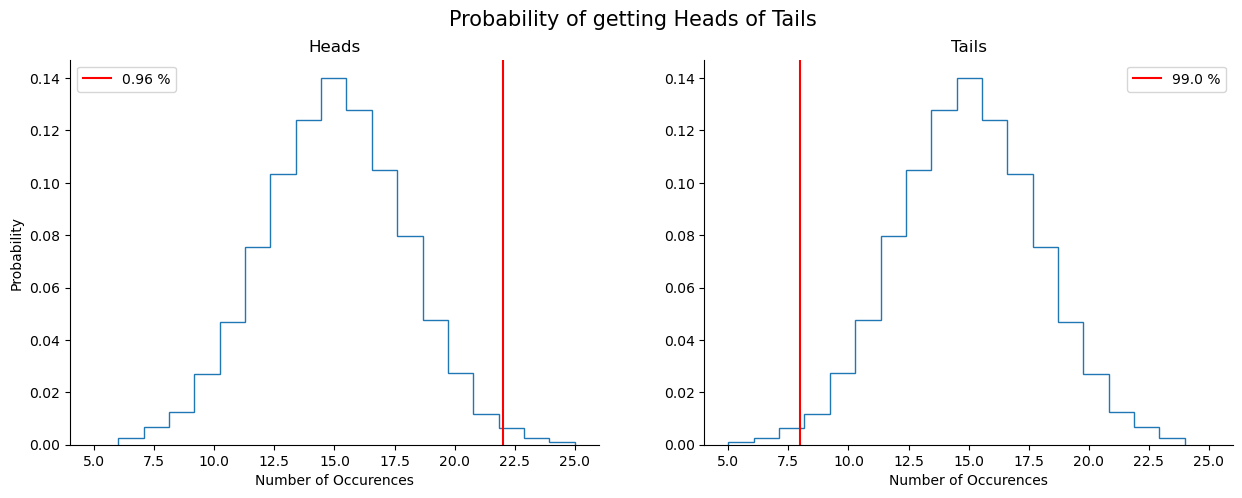

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5), sharex=True)
fig.suptitle(f"Probability of getting Heads of Tails", fontsize=15)

ax[0].hist(heads_list, bins=18, 
           histtype='step', density=True);
ax[0].set(title='Heads', ylabel='Probability')
ax[0].axvline(22, c='r', label=f"{p_heads*100:.3} %")
ax[0].legend()

ax[1].hist(tails_list, bins=18, 
           histtype='step', density=True);
ax[1].set(title='Tails')
ax[1].axvline(8, c='r', label=f"{p_tails*100:.3} %")
ax[1].legend()

for axs in ax.reshape(-1):
    axs.set(xlabel='Number of Occurences')
    
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)
    axs.tick_params(left=True, bottom=True, 
                    labelleft=True, labelbottom=True)

## B. Shuffling

<img src="https://files.speakerdeck.com/presentations/518cae54da12460e895163d809e25933/slide_27.jpg" width=500/>

- **Idea:** Simulate the distribution by shuffling the labels repeatedly and computing the desired statistics.
- **Motivation:** If the labels really don't matter, then switching them shoudn't change the result!

- Re-type statistical data from the presentation.
- Adding `:.1f` prints a rounded float to the nearest tenths.

In [ ]:
stars_scores = np.array([84, 72, 57, 46, 63, 76, 99, 91])
nostars_scores = np.array([81, 69, 74, 61, 56, 87, 69, 65, 66, 44, 62, 69])

print(f"Mean of Stars score: {stars_scores.mean():.1f}")
print(f"Mean of Crosses score: {nostars_scores.mean():.1f}")
print(f"Difference: {(stars_scores.mean() - nostars_scores.mean()):.1f}")

Mean of Stars score: 73.5
Mean of Crosses score: 66.9
Difference: 6.6


- Create a function `score_shuffler` to shuffle element positions between two arrays.

In [ ]:
def score_shuffler(score1, score2):
    """
    Shuffles elements between two given arrays `score1` and `score2`.
    """
    stacked_score = np.hstack((score1, score2))
    
    shuffled_score1 = np.random.choice(stacked_score, size=score1.size)
    shuffled_score2 = np.random.choice(stacked_score, size=score2.size)
    
    return shuffled_score1, shuffled_score2

- Perform the shuffling
    - Shuffle labels and rearrange
    - Compute means and differences
    - Repeat 10,000 times.

In [ ]:
np.random.seed(123)
diff_list = []

for i in range(10000):
    sh_stars_scores, sh_nostars_scores = score_shuffler(stars_scores, nostars_scores)
    diff_list.append(sh_stars_scores.mean() - sh_nostars_scores.mean())

diff_list = np.array(diff_list)

- What's the percentage of the scores greater than 6.6?

In [ ]:
pct = len(diff_list[diff_list>6.6])/10000
pct

0.1449

- Plot results.

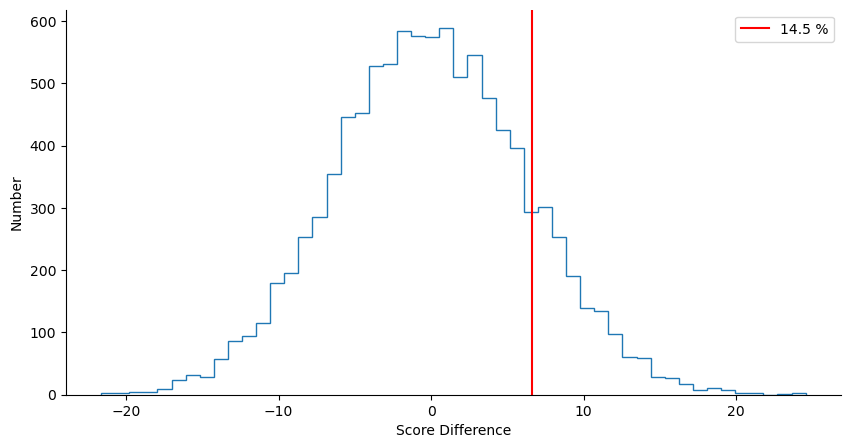

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(diff_list, bins=50, histtype='step');
ax.set(xlabel='Score Difference', ylabel='Number')
ax.axvline(6.6, c='r', label=f"{pct*100:.3} %")
ax.legend()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(left=True, bottom=True,
               labelleft=True, labelbottom=True)

### Notes:

- Works when the Null Hypothesis assumes two groups are equivalent.
- Like all methods, it will only work if your samples are representative - always be careful about selection biases!
- Needs care for non-independent trials. Good discussion in Simon's [Resampling: The New Statistics](https://www.amazon.com/Resampling-statistics-Julian-Lincoln-Simon/dp/0534217206).

## C. Bootstrapping

<img src="https://files.speakerdeck.com/presentations/518cae54da12460e895163d809e25933/slide_72.jpg" width=500/>

- **Idea:** Simulate the distribution by drawing samples with replacement.
- **Motivation:** The data estimates its own distribution - we draw samples from this distribution.

- Re-type data as `numpy` array.

In [ ]:
N = np.array([48,24,32,61,51,12,32,18,19,24,21,41,29,21,25,23,42,18,23,13])

- Perform bootstrapping as shown at the presentation.

In [ ]:
np.random.seed(69)

xbar = []
for i in range(10000):
    sample = N[np.random.randint(20, size=20)]
    xbar.append(np.mean(sample))
    
xbar = np.array(xbar)
print(f"Height = {np.mean(xbar):.0f} \u00B1 {np.std(xbar):.0f} turtles")

Height = 29 ± 3 turtles


### Notes:

- Bootstrap resampling is well-studied and rests on solid theoretical grounds.
- Bootstrapping often doesn't work well for rank-based statistics (e.g. maximum value).
- Works poorly for very few samples ($N>20$ is a good rule of thumb).
- As always, be careful about selection biases & non-independent data!

### End of tutorial.

---

# Sample Exercises

- Try to solve these exercises if you can.


1.) Write a for-loop in only two lines of code which gives the following output when ran: 

(1, apple) <br>
(2, ball) <br>
(3, cat) <br>
(4, donkey) <br>

In [ ]:
# enter code to exercise #1 here



2.) Fill in the blanks to generate an infinite loop that does not end
unless the user enters "UP DSSoc". <br>
(the input function in python is used to accept user input from the notebook interface)

3.) In the given <i>scores </i> data below, determine the difference between the mean and the median, and the percentage of the scores greater than 20 using any python code, and print them.

In [ ]:
scores = np.array([48,24,32,61,51,12,32,18,19,24,21,41,29,21,25,23,42,18,23,13])

In [ ]:
# add your own code for exercise #3



4.a.) Create a function `Welch_Ttest()` that has input parameters `X_1` and `X_2`, and solves for <b> t </b>. Use your function to calculate <b> t </b> using arrays `stars_scores` and `nostars_scores`. The value obtained should be 0.932. <br>

Welch's t-test is defined by the following formula: <br>
<br>
<b> Welch's t-test </b>

$$t={\frac {{\overline {X}}_{1}-{\overline {X}}_{2}}{\sqrt {{s_{{\bar {X}}_{1}}^{2}}+{s_{{\bar {X}}_{2}}^{2}}}}}$$

Wherein:
- $\bar{X}_1, \bar{X}_2$: mean of samples $X_1, X_2$
- $s_1, s_2$: standard deviation of the mean of samples $X_1, X_2$
    - By setting `ddof=1` (delta degrees of freedom), we set the divisor to $n-1$, so we have $s = \sqrt{\frac{\sum_{i=1}^N (x_i - \bar{X})^2}{n-1}}$
- $n_1, n_2$: sample sizes of samples $X_1, X_2$








In [ ]:
# Create your Welch_TTest function here


4.b.) Create a function `Welch_Satthertwaite()` that has input parameters $s_1$, $s_2$, $N_1$, and $N_2$, and solves for <b> v </b>. Use your function to calculate <b> v </b> using arrays `stars_scores` and `nostars_scores`. The value obtained should be 10.7. <br>
<b> Welch-Sattherthwaite equation </b>

$$ v \approx = \frac{ \left( \frac{s_1^2}{N_1} +  \frac{s_2^2}{N_2} \right)^2 }{ \frac{s_1^4}{N_1^2(N_1-1)} +  \frac{s_2^4}{N_2^2(N_2-1)}} $$

Wherein:
- $s_1, s_2$: standard deviation of the mean of samples $X_1, X_2$
- $N_1, N_2$: sample sizes of samples $X_1, X_2$

In [ ]:
# Create your Welch_Satthertwaite function here

4.c.) Create a function `Student_t_distrib()` that has input parameters $t$ and $\nu$, that calculates the Student's t-distribution. <br>
Student's t-distribution is defined by the following formula: <br>

<b> Student's t-distribution </b>
$$p(t;v) ={\frac {\Gamma ({\frac {\nu +1}{2}})}{{\sqrt {\nu \pi }}\,\Gamma ({\frac {\nu }{2}})}}\left(1+{\frac {t^{2}}{\nu }}\right)^{-(\nu +1)/2}$$

Wherein:
- $t$: Welch's t-test
- $\nu$: Degrees of freedom, as given by Welch-Satterthwaithe Equation

In [ ]:
# Create your Student_t_distrib function here